# **Team cl_AI_mate**
---
#### Team members
* **Harsh Soni**
* **Shivansh Rastogi**
* **Gaurav Garwa**
* **Prakhar Raj Pandey**  

---
 [Website](https://harshhrs24-team-cl-ai-mate-app-md7w7w.streamlit.app/
)

[Proof of concept](https://www.craft.do/s/1eTduABsPuFIDX
)

---
 






# Explanatory Data Analysis 
## Air Quality Index Forecasting


 

### Modules and packages requirement

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px 

mpl.rcParams['figure.figsize'] = (24, 8)
mpl.rcParams['axes.grid'] = False



 
> ### Loading the data
### Data Source - OpenWether API
- Multivariate Timeseries of weather parameter 
- Location - Adilabad (Considered for the scope of thi EDA) 
- Resolutuion - hourly


In [ ]:
# df = pd.read_csv('./data/ad.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Adilabad.csv' )

> ### Data Preprocessing


In [ ]:
# Preview of the Data 
df.head() 

Unnamed: 0  aqi      co   no    no2     o3    so2  pm2_5    pm10    nh3  \
0           0    5  547.41  0.0  15.42  62.23  17.41  83.26   90.25  10.01   
1           1    5  547.41  0.0  14.57  52.93  15.50  85.47   92.45  10.64   
2           2    5  560.76  0.0  13.71  46.49  14.66  90.58   97.68  10.77   
3           3    5  554.09  0.0  12.00  43.27  14.66  94.05  101.20  10.64   
4           4    5  547.41  0.0  10.71  39.34  13.23  95.62  102.83  10.64   

                    dt  
0  2020-12-02 00:30:00  
1  2020-12-02 01:30:00  
2  2020-12-02 02:30:00  
3  2020-12-02 03:30:00  
4  2020-12-02 04:30:00

> ### Data Size 
- 17400 Rows 
- 11 Columns

In [ ]:
#size
df.shape

(17400, 11)

### Checking for Null values and data types
- No null value encountered in any feature
- 9 Numerical Data columns 
- 1 Object column containing timestamp of the data

- Obejct datatype is required to be converted to Datetime data type for set it as the index of the time series data 


In [ ]:
#meta date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  17400 non-null  int64  
 1   aqi         17400 non-null  int64  
 2   co          17400 non-null  float64
 3   no          17400 non-null  float64
 4   no2         17400 non-null  float64
 5   o3          17400 non-null  float64
 6   so2         17400 non-null  float64
 7   pm2_5       17400 non-null  float64
 8   pm10        17400 non-null  float64
 9   nh3         17400 non-null  float64
 10  dt          17400 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ MB


## Generating descriptive statistics of the Features
- count: number of non-missing values in each column
- mean: mean (average) of each column
- std: standard deviation of each column
- min: minimum value of each column
- 25%: 25th percentile (lower quartile) of each column
- 50%: 50th percentile (median) of each column
- 75%: 75th percentile (upper quartile) of each column
- max: maximum value of each column



In [ ]:
#Generate descriptive statistics.
# get sense of the data 

df.describe()

Unnamed: 0          temp     feelslike           dew      humidity  \
count  97176.000000  97176.000000  97176.000000  97176.000000  97176.000000   
mean   48587.500000     27.170615     27.479283     15.235299     56.264844   
std    28052.439217      6.487733      6.622533      7.565800     27.645034   
min        0.000000      7.800000      5.900000    -14.400000      3.660000   
25%    24293.750000     23.300000     23.300000      9.900000     30.410000   
50%    48587.500000     26.700000     26.600000     16.200000     57.230000   
75%    72881.250000     30.900000     32.300000     22.300000     82.480000   
max    97175.000000     47.500000     53.600000     28.600000    100.000000   

             precip    precipprob    snow  snowdepth     windgust  ...  \
count  97169.000000  97176.000000  9257.0     9270.0  9270.000000  ...   
mean       0.107761     20.570923     0.0        0.0    14.501435  ...   
std        0.420475     40.422101     0.0        0.0    11.874320  ...   
min        0.000000      0.000000     0.0        0.0     0.400000  ...   
25%        0.000000      0.000000     0.0        0.0     5.800000  ...   
50%        0.000000      0.000000     0.0        0.0    10.100000  ...   
75%        0.000000      0.000000     0.0        0.0    20.200000  ...   
max       24.600000    100.000000     0.0        0.0    70.200000  ...   

            winddir  sealevelpressure    cloudcover    visibility  \
count  97176.000000      11419.000000  97176.000000  11418.000000   
mean     175.090623       1008.079937     52.045447     19.492161   
std      105.601163          5.535880     36.724716      7.176977   
min        0.000000        990.900000      0.000000      1.300000   
25%       71.000000       1004.000000     11.600000     10.000000   
50%      172.700000       1008.000000     59.500000     24.100000   
75%      271.700000       1013.000000     88.200000     24.100000   
max      360.000000       1023.000000    100.000000     50.000000   

       solarradiation   solarenergy       uvindex   severerisk           far  \
count    97150.000000  52709.000000  97150.000000  9270.000000  97176.000000   
mean       230.411820      1.528280      2.292043    12.151241     80.907107   
std        309.677275      1.106215      3.108307     8.558506     11.677920   
min          0.000000      0.000000      0.000000     3.000000     46.040000   
25%          0.000000      0.500000      0.000000    10.000000     73.940000   
50%         10.200000      1.500000      0.000000    10.000000     80.060000   
75%        456.000000      2.500000      5.000000    10.000000     87.620000   
max       1074.500000      3.900000     10.000000    75.000000    117.500000   

         heat_index  
count  97176.000000  
mean      83.398561  
std       10.222194  
min       55.632344  
25%       76.600653  
50%       82.079335  
75%       90.374390  
max      128.755284  

[8 rows x 21 columns]

### Data is a multivariate timeseries of weather parameter 
- Location - Adilabad 
- Resolutuion - hourly 



In [ ]:
# data size
df.shape

(17400, 11)

## Feature Correlation 
- Pearson correlation is a statistical measure of the linear correlation between two continuous variables. It measures the degree of association between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). A value of 0 indicates no correlation between the variables.

- Pearson correlation is often used to measure the strength and direction of the relationship between two features in a dataset. This helps to identify which features are highly correlated and which ones are not



In [ ]:

hw_corr = df[['temp','humidity','heat_index', 'uvindex','windspeed','precip']].corr(method='pearson')
hw_corr

temp  humidity  heat_index   uvindex  windspeed    precip
temp        1.000000 -0.579766    0.841288  0.573959   0.148446 -0.021366
humidity   -0.579766  1.000000   -0.564028 -0.416567   0.045165  0.238763
heat_index  0.841288 -0.564028    1.000000  0.563616   0.147434 -0.019412
uvindex     0.573959 -0.416567    0.563616  1.000000   0.200744 -0.032554
windspeed   0.148446  0.045165    0.147434  0.200744   1.000000  0.167302
precip     -0.021366  0.238763   -0.019412 -0.032554   0.167302  1.000000

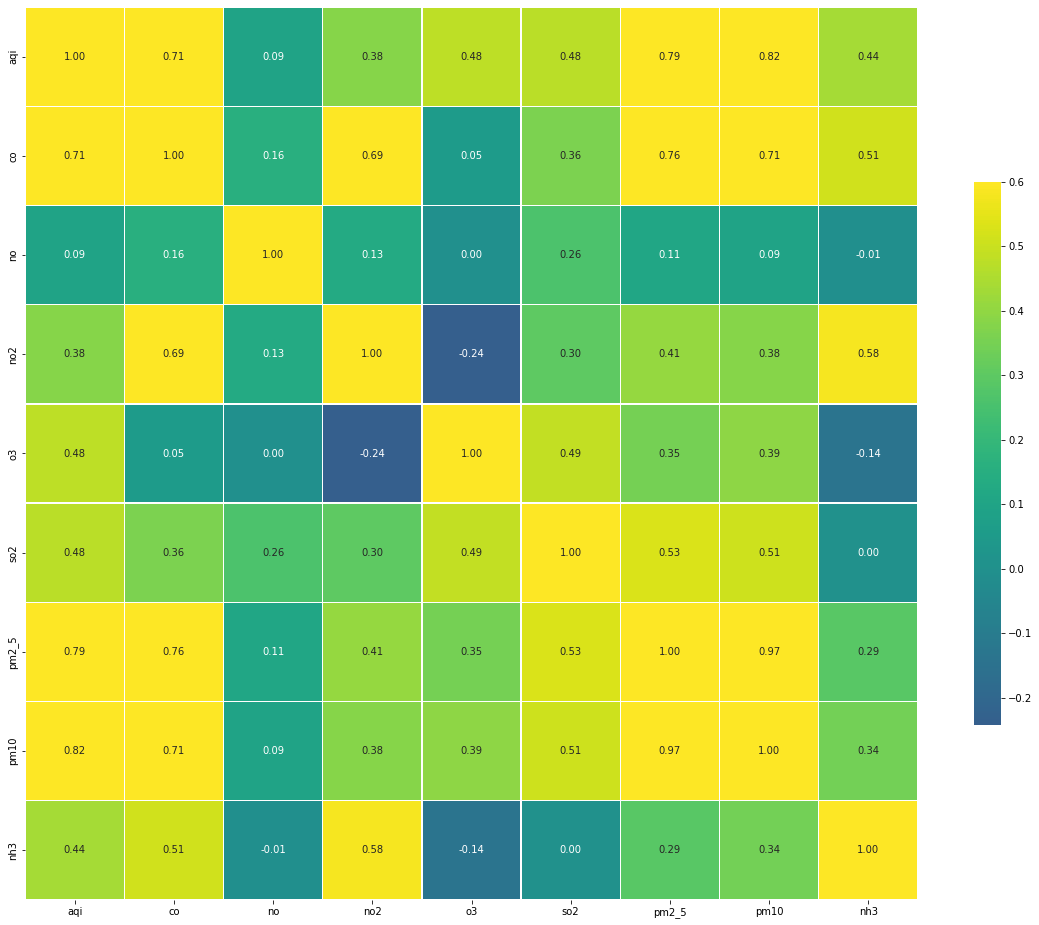

In [ ]:
g = sns.heatmap(aqi_corr,  vmax=.6, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='viridis')
g.figure.set_size_inches(20,20)    
plt.show()

## Feature pairplot
- relationship between all pairs of features in a dataset
- The diagonal of the grid usually shows a histogram or a kernel density estimate (KDE) of each feature

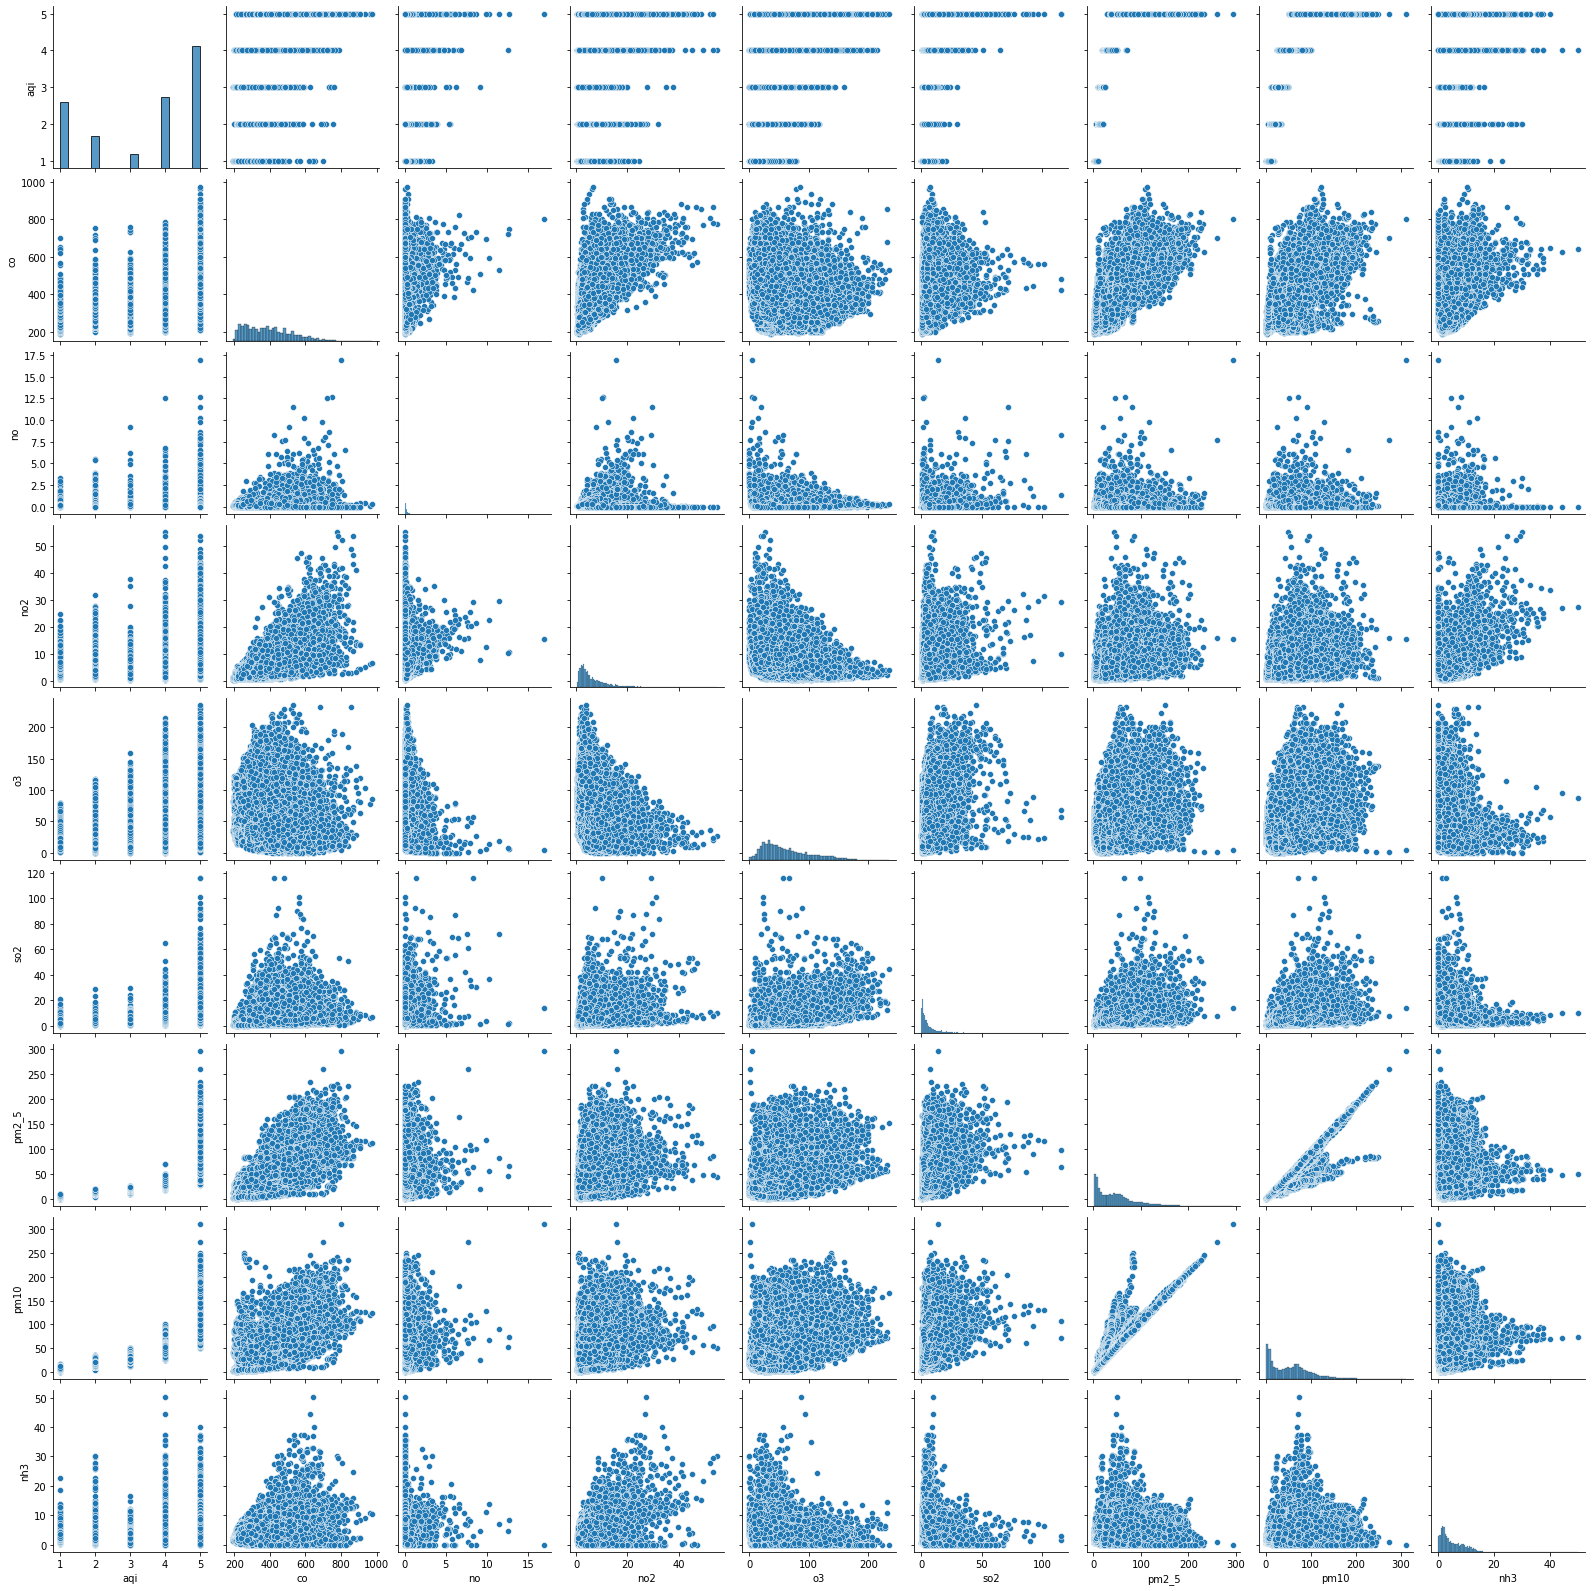

In [ ]:
sns.pairplot(df[['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10','nh3']])

### Decomposing the features 
- Seasonal decomposition using moving averages and returns a object with seasonal, trend, and resid attributes.



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [ ]:
# using PM2.5 feature for the next analysis
col = 'pm2_5' 

In [ ]:
# taking PM2.5 column
ts = df.loc[: , ['dt' ,col]] 

# changing timestamp data type from Object to datetime
ts['dt'] =  pd.to_datetime(ts['dt'])

# Setting timestamp column as Index
ts = ts.set_index('dt')

### Data Resampling
- Changing the frequency of the time series data. It involves aggregating or downsampling the data from a higher frequency to a lower frequency or upsampling the data from a lower frequency to a higher frequency.



In [ ]:
ts = ts.resample('D').max()

In [ ]:
ts = ts.reindex()
ts.iloc[596] = ts.iloc[595]

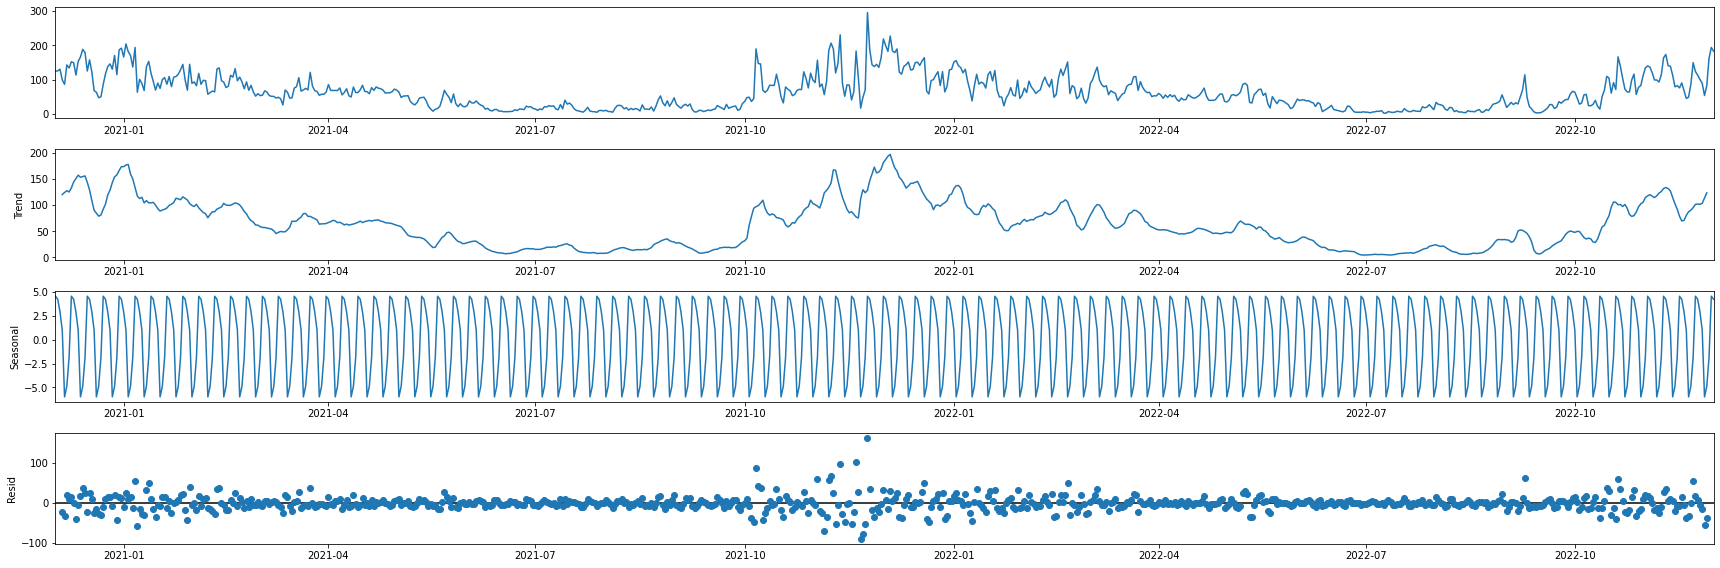

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ts
result = seasonal_decompose(series, model='additive')
ax = result.plot()
ax.show()

# pm2.5

In [ ]:
col = 'aqi'
ts = df.loc[: , ['dt' ,col ]]
ts['dt'] =  pd.to_datetime(ts['dt'])
ts = ts.set_index('dt')
ts = ts.resample('D').max()
ts = ts.reindex()
ts.iloc[596] = ts.iloc[595]

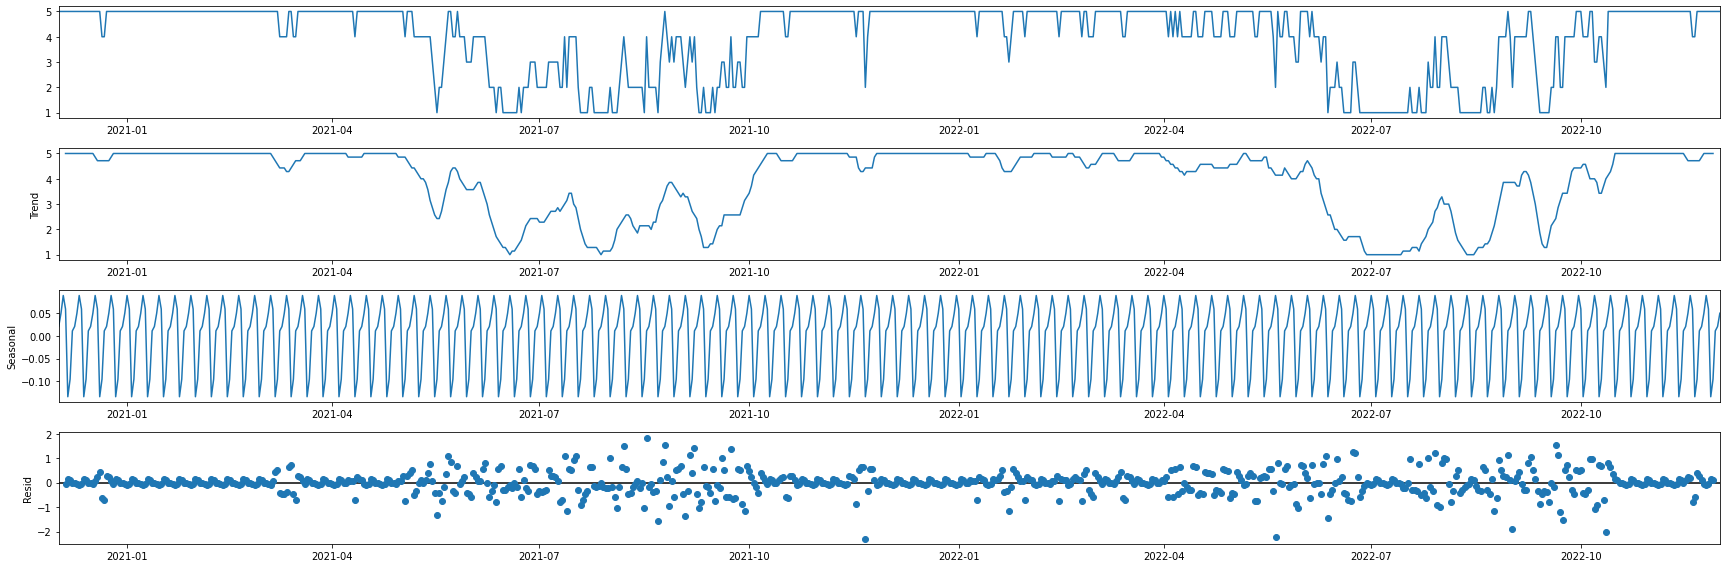

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ts
result = seasonal_decompose(series, model='additive')
ax = result.plot()
ax.show()

# AQI

In [ ]:
col = 'pm10'
ts = df.loc[: , ['dt' ,col ]]
ts['dt'] =  pd.to_datetime(ts['dt'])
ts = ts.set_index('dt')
ts = ts.resample('D').max()
ts = ts.reindex()
ts.iloc[596] = ts.iloc[595]

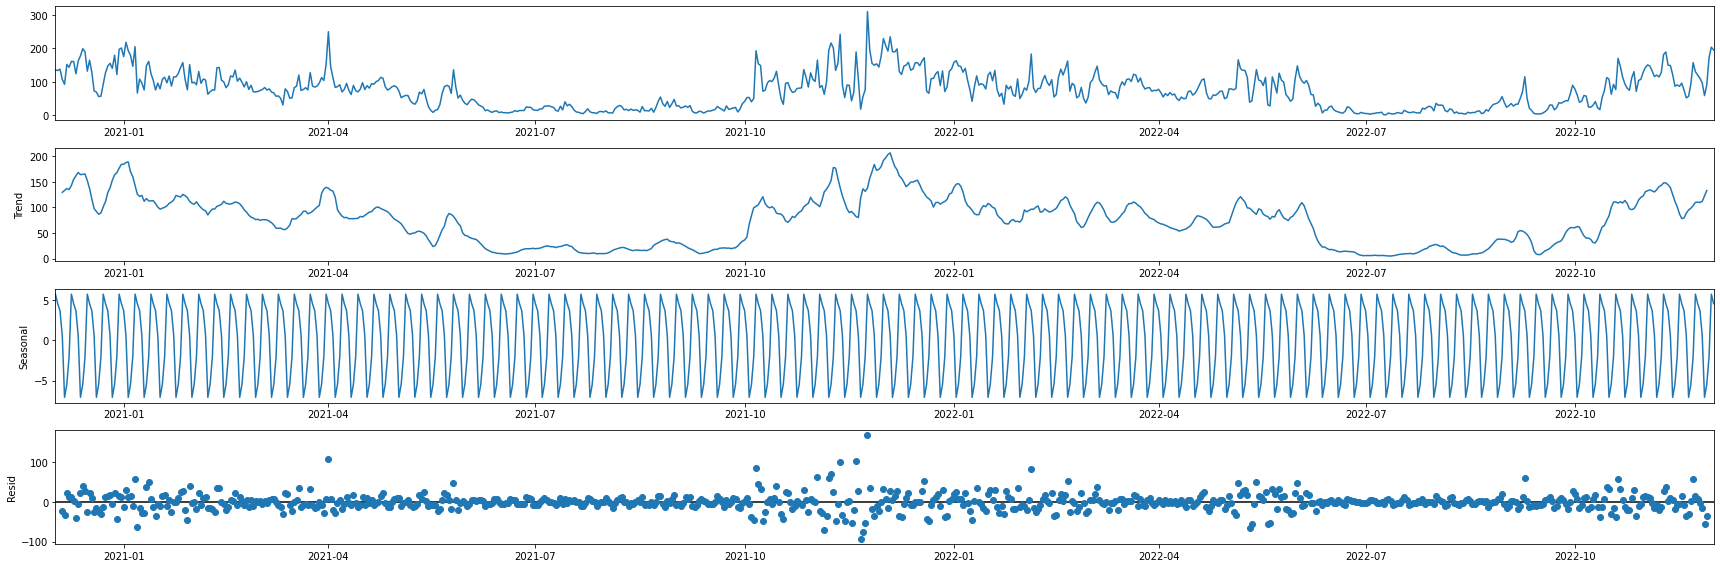

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = ts
result = seasonal_decompose(series, model='additive')
ax = result.plot()
ax.show()

## ADF (Augmented Dickey-Fuller) unit root test 
### The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the presence of serial correlation.





Test statistic:  -2.2868258767589276
p-value:  0.1762520980034435
Critical Values: {'1%': -3.4395289262948894, '5%': -2.8655907692307694, '10%': -2.5689271030368235}


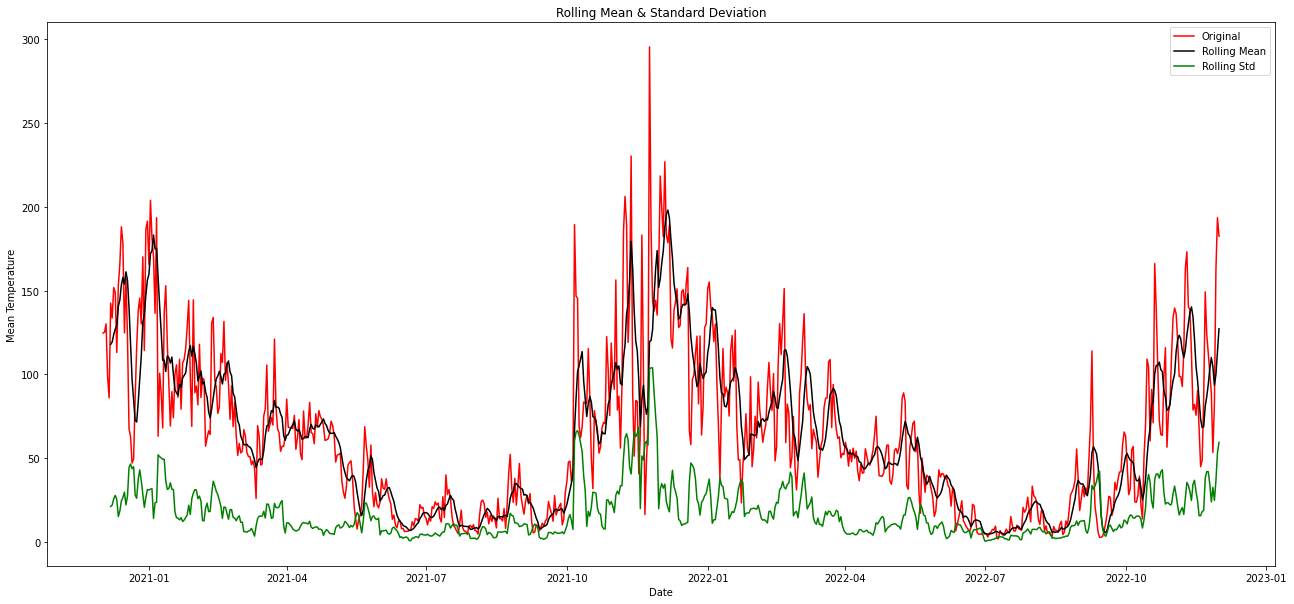

In [ ]:
# ADF TEST of pm2_5
# adfuller library 
from statsmodels.tsa.stattools import adfuller

# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
  
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts[col])


### Moving average method
- Moving average method is a statistical technique used to analyze time-series data by smoothing out fluctuations in the data and highlighting any underlying trends or patterns.  The moving average method works by calculating the average of a specified number of past observations, and then using this average to forecast the next value in the series.

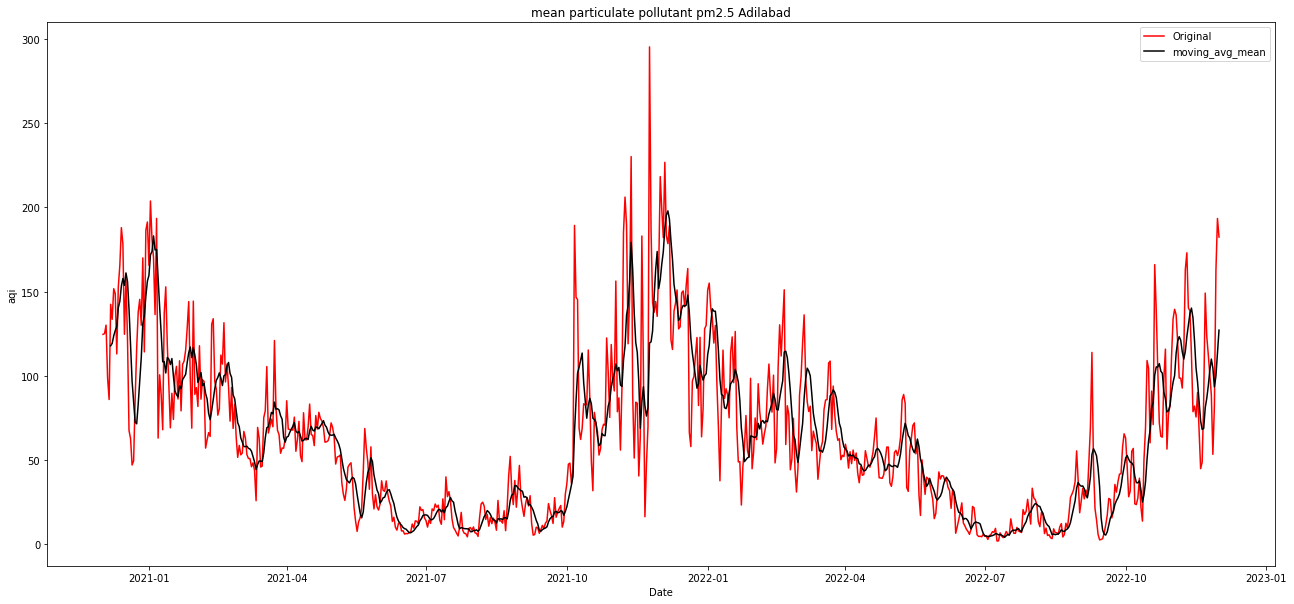

In [ ]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("mean particulate pollutant pm2.5 Adilabad")
plt.xlabel("Date")
plt.ylabel("aqi")
plt.legend()
plt.show()

Test statistic:  -9.21588979069083
p-value:  1.834407996709722e-15
Critical Values: {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}


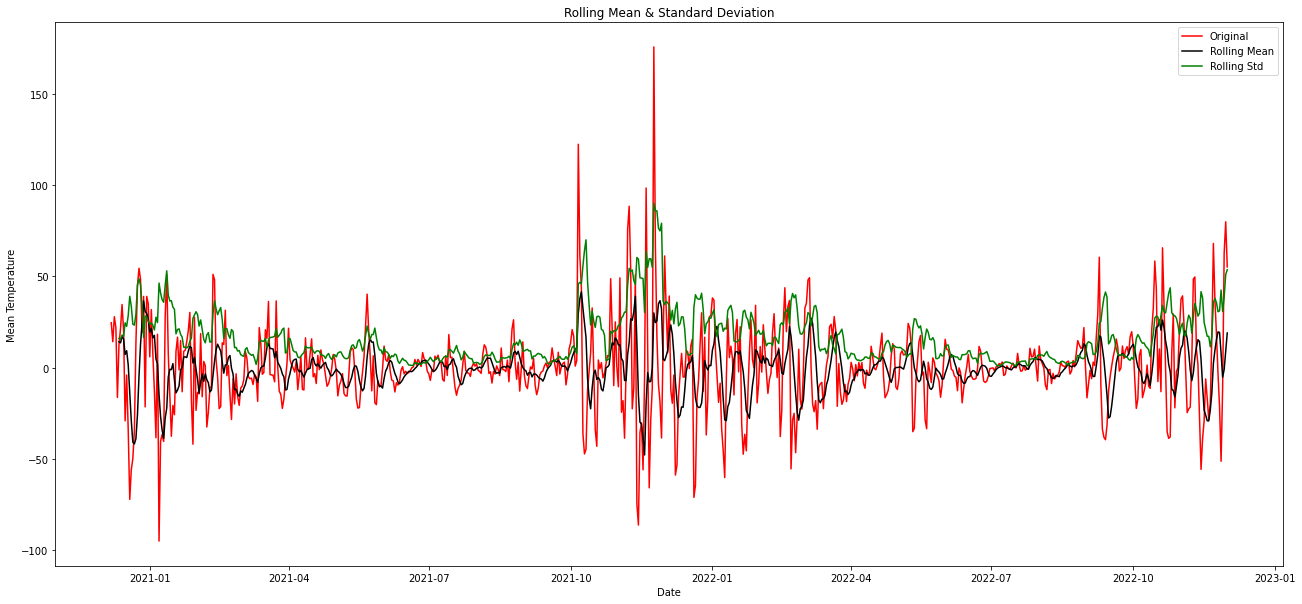

In [ ]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size (000001) - type window

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff[col])

### Differencing method
- Differencing method is a statistical technique used to transform a non-stationary time-series into a stationary one by taking the difference between consecutive observations. This method is commonly used in time-series analysis to remove the trend or seasonality in the data and to make it suitable for further analysis and forecasting.



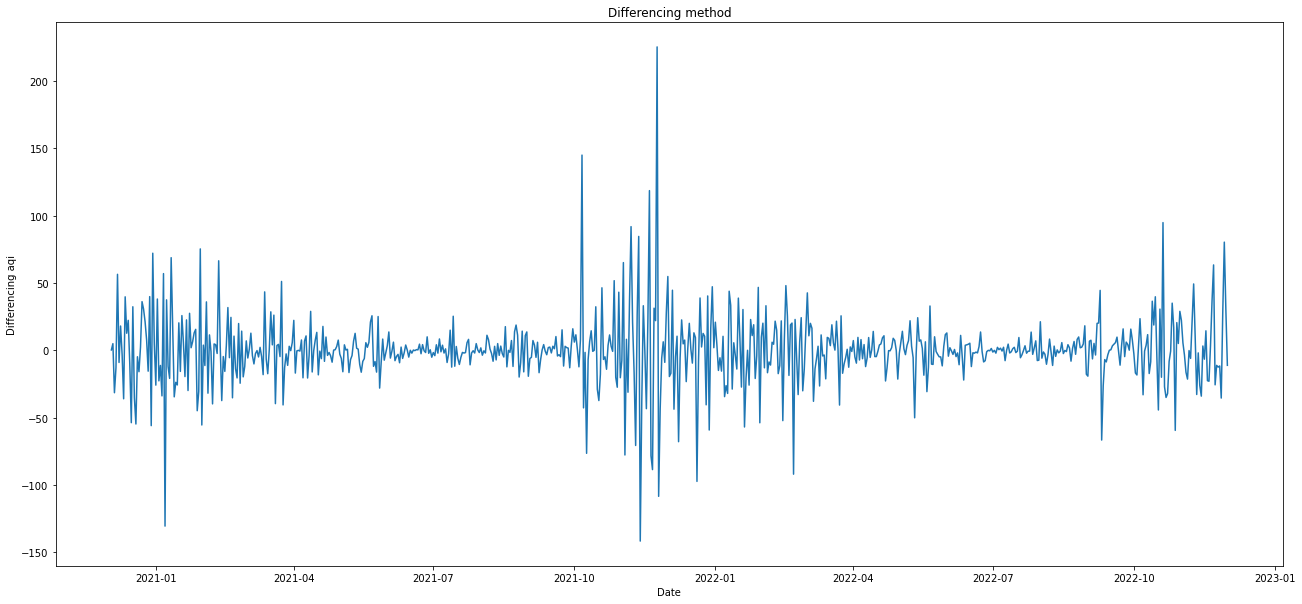

In [ ]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing aqi")
plt.show()


Test statistic:  -10.938056834719893
p-value:  9.448973931433473e-20
Critical Values: {'1%': -3.4395289262948894, '5%': -2.8655907692307694, '10%': -2.5689271030368235}


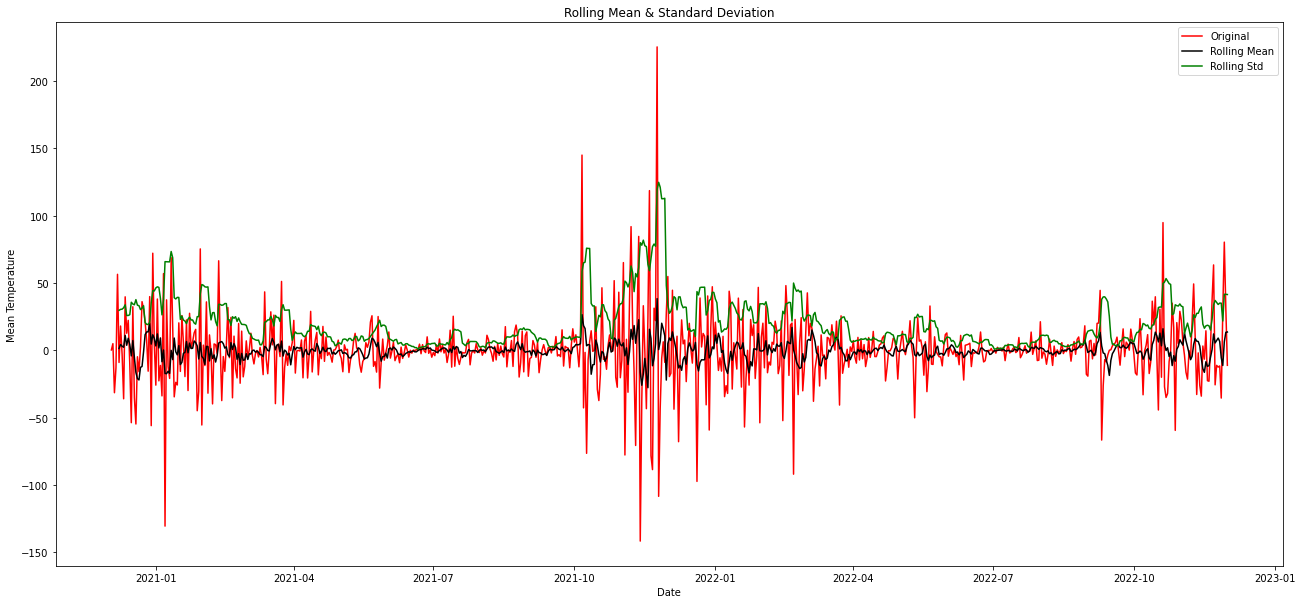

In [ ]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff[col])

In [ ]:
# ARIMA Prediction 

## Prediction with ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

<ipython-input-40-75537721b9e7>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


### Model fitting

In [ ]:
# fit model ARIMA
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()

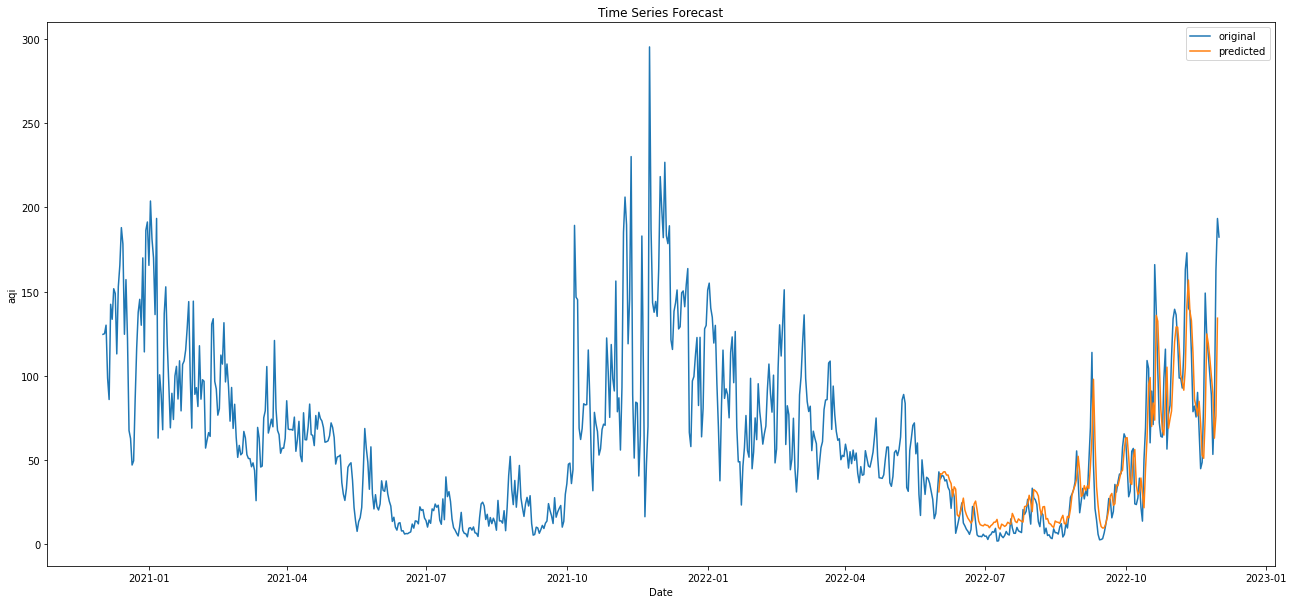

In [ ]:
# predict
start_index = datetime(2022, 6, 1)
end_index = datetime(2022, 11, 30)
forecast = model_fit.predict(start=start_index, end=end_index)

# visualization
plt.figure(figsize=(22,10))
plt.plot(ts.index,ts[col],label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("aqi")
plt.legend()
plt.show()

In [ ]:
ground_truth = ts.loc['2022-06-01':'2022-11-30']

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
score_mae = mean_absolute_error(ground_truth['pm2_5'] , forecast)
score_rmse = math.sqrt(mean_squared_error(ground_truth['pm2_5'] , forecast))
print( "MAE -", score_mae ,"|", "RMSE -", score_rmse)

MAE - 12.932854998306395 | RMSE - 19.677737321203324


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Adilabad.csv')

In [ ]:
col = 'pm2_5'

In [ ]:
df_full = df

In [ ]:
df_full = df_full.set_index(df_full['dt'])

In [ ]:
datetime = df_full['dt']

In [ ]:
df_full = df_full[[col]]

In [ ]:
df21 = df_full

In [ ]:
df21.head(1)

pm2_5
dt                        
2020-12-02 00:30:00  83.26

In [ ]:
#--- hourly ------ 87672 rows × 2 columns
87672/365/24

10.008219178082191

In [ ]:
date_time = pd.to_datetime(df21.index)
date_time

DatetimeIndex(['2020-12-02 00:30:00', '2020-12-02 01:30:00',
               '2020-12-02 02:30:00', '2020-12-02 03:30:00',
               '2020-12-02 04:30:00', '2020-12-02 05:30:00',
               '2020-12-02 06:30:00', '2020-12-02 07:30:00',
               '2020-12-02 08:30:00', '2020-12-02 09:30:00',
               ...
               '2022-12-01 14:30:00', '2022-12-01 15:30:00',
               '2022-12-01 16:30:00', '2022-12-01 17:30:00',
               '2022-12-01 18:30:00', '2022-12-01 19:30:00',
               '2022-12-01 20:30:00', '2022-12-01 21:30:00',
               '2022-12-01 22:30:00', '2022-12-01 23:30:00'],
              dtype='datetime64[ns]', name='dt', length=17400, freq=None)

In [ ]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

Float64Index([1606869000.0, 1606872600.0, 1606876200.0, 1606879800.0,
              1606883400.0, 1606887000.0, 1606890600.0, 1606894200.0,
              1606897800.0, 1606901400.0,
              ...
              1669905000.0, 1669908600.0, 1669912200.0, 1669915800.0,
              1669919400.0, 1669923000.0, 1669926600.0, 1669930200.0,
              1669933800.0, 1669937400.0],
             dtype='float64', name='dt', length=17400)

In [ ]:
day = 24*60*60
year = (365.2425)*day

df21['d_sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df21['d_cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df21['y_sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df21['y_cos'] = np.cos(timestamp_s * (2 * np.pi / year))


## converting time to signal 
#### Neural Networks uses time as a Feature 
#### To use time as a feature we convert it as signal and use its prediocity in the model 


In [ ]:


df21.iloc[:365]['y_sin'].plot()
df21.iloc[:365]['y_cos'].plot()
plt.xlabel('Time [y]')
plt.title('Year signal')

## Fast Fourier Transform (FFT)
### FFT can be used to calculate the cross-correlation between the two signals in the frequency domain.
The FFT is a fast and efficient algorithm for calculating the cross-correlation between two signals, making it a popular choice in many applications such as audio signal processing, image processing, and communication systems.






[   0    1    2 ... 8698 8699 8700] 8766.0576 1.984928778017612 [0.00000000e+00 5.03796414e-01 1.00759283e+00 ... 4.38202121e+03
 4.38252500e+03 4.38302880e+03]


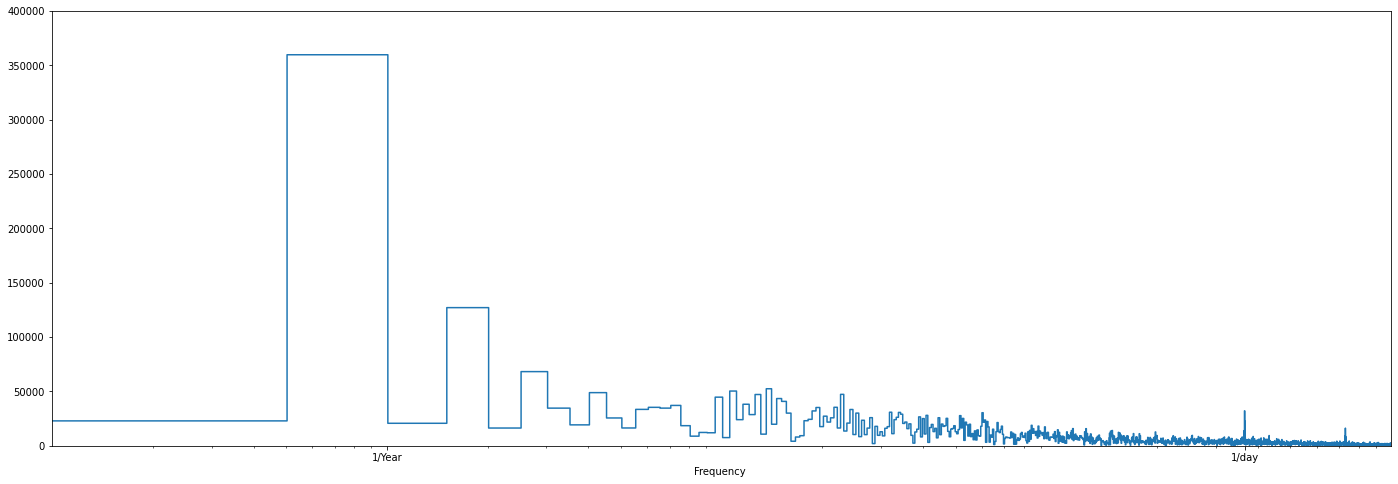

In [ ]:
fft = tf.signal.rfft(df21[col])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df21[col])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
print(f_per_dataset , hours_per_year ,years_per_dataset ,f_per_year)

plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, 1000])
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency ')

In [ ]:
df21 = df21.reset_index()

In [ ]:
df21.pop('dt')

0        2020-12-02 00:30:00
1        2020-12-02 01:30:00
2        2020-12-02 02:30:00
3        2020-12-02 03:30:00
4        2020-12-02 04:30:00
                ...         
17395    2022-12-01 19:30:00
17396    2022-12-01 20:30:00
17397    2022-12-01 21:30:00
17398    2022-12-01 22:30:00
17399    2022-12-01 23:30:00
Name: dt, Length: 17400, dtype: object

In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2_5   17400 non-null  float64
 1   d_sin   17400 non-null  float64
 2   d_cos   17400 non-null  float64
 3   y_sin   17400 non-null  float64
 4   y_cos   17400 non-null  float64
dtypes: float64(5)
memory usage: 679.8 KB


In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df21)
train_df = df21[0:int(n*0.7)]
val_df = df21[int(n*0.7):int(n*0.9)]
test_df = df21[int(n*0.9):]

num_features = df21.shape[1]

print(train_df.shape , val_df.shape , test_df.shape)

(12180, 5) (3480, 5) (1740, 5)


# Normalization

### It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

 The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.



In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
train_std

pm2_5    41.026700
d_sin     0.707136
d_cos     0.707136
y_sin     0.691047
y_cos     0.691184
dtype: float64

In [ ]:
train_df

pm2_5     d_sin     d_cos     y_sin     y_cos
0      0.737767  0.183695  1.402057 -0.908375  1.041961
1      0.791634  0.540285  1.306509 -0.907467  1.042462
2      0.916187  0.859994  1.121925 -0.906559  1.042963
3      1.000766  1.121036  0.860883 -0.905650  1.043463
4      1.039034  1.305620  0.541174 -0.904741  1.043962
...         ...       ...       ...       ...       ...
12175 -0.344211  1.305620 -0.541174  1.113080 -0.813771
12176 -0.319593  1.121036 -0.860883  1.112657 -0.814718
12177 -0.337387  0.859994 -1.121925  1.112233 -0.815665
12178 -0.348355  0.540285 -1.306509  1.111809 -0.816611
12179 -0.377117  0.183695 -1.402057  1.111384 -0.817557

[12180 rows x 5 columns]

In [ ]:
df_std = (df21 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')

 ### Feature Distribution
 - Understanding the distribution of features is important for various tasks in data analysis, such as identifying outliers, selecting appropriate statistical tests, and building machine learning models.

 - Below is the plot:


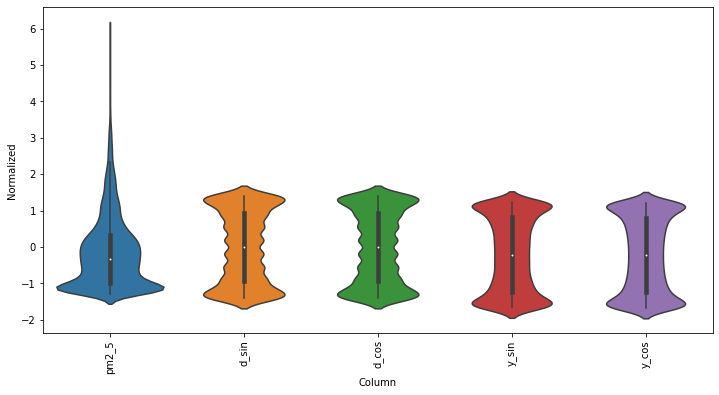

In [ ]:

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df21.keys(), rotation=90)

# Data windowing - 
 
The process of windowing involves selecting a window size and sliding the window along the time axis of the data sequence. At each position, the data within the window is analyzed or processed, often using techniques such as Fourier analysis, wavelet analysis, or statistical analysis.
The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data.

The main features of the input windows are:

*   The width (number of time steps) of the input and label windows.
*   The time offset between them.
*   Which features are used as inputs, labels, or both.
   
This will builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both.
Single-output, and multi-output predictions.
Single-time-step and multi-time-step predictions.
This section focuses on implementing the data windowing so that it can be reused for all of those models.



##### - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### 1. Indexes and offsets
Start by creating the ***WindowGenerator*** class. The __init__ method includes all the necessary logic for the input and label indices.

It also takes the training, evaluation, and test DataFrames as input. These will be converted to tf.data.Datasets of windows later.

### 2. Split
Given a list of consecutive inputs, the split_window method will convert them to a window of inputs and a window of labels.

### 3. Plot
The plot function will provide a simple visualization of the split window
 





In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns

    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    return inputs, labels
    

  # WindowGenerator.split_window = split_window

  def plot(self, model=None, plot_col=col, max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')

  # WindowGenerator.plot = plot

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32,)

    ds = ds.map(self.split_window)

    return ds
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result


## Fitting and Compiling
### Defining Model Hyperparameters 

In [ ]:
MAX_EPOCHS = 5

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

## Multi-step models
Both the single-output and multiple-output models in the previous sections made single time step predictions, one hour into the future.

This section looks at how to expand these models to make multiple time step predictions.

In a multi-step prediction, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predicts a sequence of the future values.

There are two rough approaches to this:

* Single shot predictions where the entire time series is predicted at once.
* Autoregressive predictions where the model only makes single step predictions and its output is fed back as its input.

In this section all the models will predict all the features across all output time steps.

For the multi-step model, the training data again consists of hourly samples. However, here, the models will learn to predict 24 hours into the future, given 24 hours of the past.
 

#### Baseline
 

97/97 [==============================] - 1s 7ms/step - loss: 0.7223 - mean_absolute_error: 0.4585


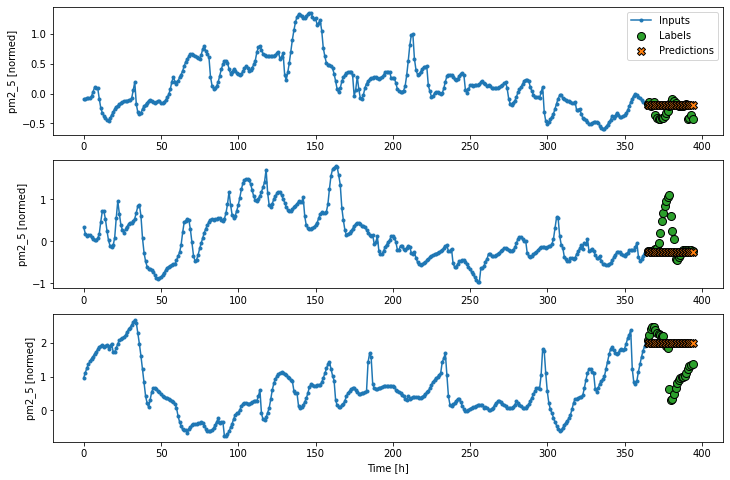

In [ ]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)

### Single-shot models
One high-level approach to this problem is to use a "single-shot" model, where the model makes the entire sequence prediction in a single step.

This can be implemented efficiently as a tf.keras.layers.Dense with OUT_STEPS*features output units. The model just needs to reshape that output to the required (OUTPUT_STEPS, features).

#### Linear model
A simple linear model based on the last input time step does better than either baseline, but is underpowered. The model needs to predict OUTPUT_STEPS time steps, from a single input time step with a linear projection. It can only capture a low-dimensional slice of the behavior, likely based mainly on the time of day and time of year.

 



Epoch 1/5
369/369 [==============================] - 5s 10ms/step - loss: 0.6300 - mean_absolute_error: 0.6794 - val_loss: 0.3449 - val_mean_absolute_error: 0.5206
Epoch 2/5
369/369 [==============================] - 2s 6ms/step - loss: 0.2463 - mean_absolute_error: 0.4124 - val_loss: 0.1111 - val_mean_absolute_error: 0.2852
Epoch 3/5
369/369 [==============================] - 3s 7ms/step - loss: 0.1154 - mean_absolute_error: 0.2610 - val_loss: 0.0402 - val_mean_absolute_error: 0.1643
Epoch 4/5
369/369 [==============================] - 4s 11ms/step - loss: 0.0693 - mean_absolute_error: 0.1676 - val_loss: 0.0186 - val_mean_absolute_error: 0.0961
Epoch 5/5
97/97 [==============================] - 1s 5ms/step - loss: 0.0125 - mean_absolute_error: 0.0600


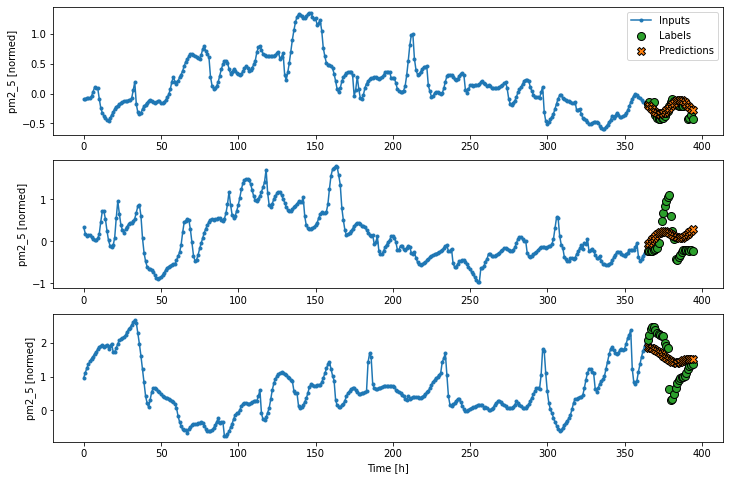

In [ ]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

### Dense
Adding a tf.keras.layers.Dense between the input and output gives the linear model more power, but is still only based on a single input time step.



Here's a model similar to the linear model, except it stacks several a few Dense layers between the input and the output:


 


Epoch 1/5
369/369 [==============================] - 6s 12ms/step - loss: 0.0960 - mean_absolute_error: 0.1350 - val_loss: 0.0090 - val_mean_absolute_error: 0.0345
Epoch 2/5
369/369 [==============================] - 3s 8ms/step - loss: 0.0458 - mean_absolute_error: 0.0698 - val_loss: 0.0089 - val_mean_absolute_error: 0.0344
Epoch 3/5
369/369 [==============================] - 3s 7ms/step - loss: 0.0453 - mean_absolute_error: 0.0689 - val_loss: 0.0088 - val_mean_absolute_error: 0.0335
Epoch 4/5
369/369 [==============================] - 4s 10ms/step - loss: 0.0449 - mean_absolute_error: 0.0684 - val_loss: 0.0086 - val_mean_absolute_error: 0.0337
Epoch 5/5
97/97 [==============================] - 1s 5ms/step - loss: 0.0087 - mean_absolute_error: 0.0349


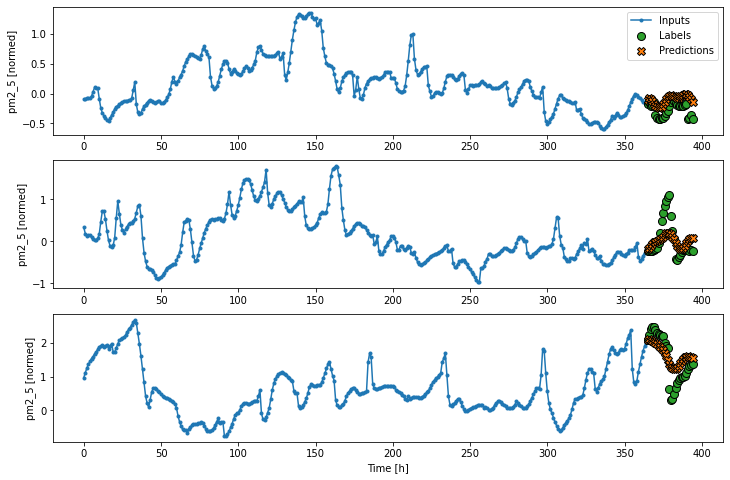

In [ ]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

# Convolution Neural Network
Convolution layer (tf.keras.layers.Conv1D) also takes multiple time steps as input to each prediction.

Below is the same model as multi_step_dense, re-written with a convolution.



Epoch 1/5
369/369 [==============================] - 9s 10ms/step - loss: 0.1037 - mean_absolute_error: 0.1450 - val_loss: 0.0090 - val_mean_absolute_error: 0.0372
Epoch 2/5
369/369 [==============================] - 3s 7ms/step - loss: 0.0464 - mean_absolute_error: 0.0717 - val_loss: 0.0090 - val_mean_absolute_error: 0.0357
Epoch 3/5
369/369 [==============================] - 3s 8ms/step - loss: 0.0460 - mean_absolute_error: 0.0713 - val_loss: 0.0088 - val_mean_absolute_error: 0.0354
Epoch 4/5
369/369 [==============================] - 4s 11ms/step - loss: 0.0455 - mean_absolute_error: 0.0704 - val_loss: 0.0088 - val_mean_absolute_error: 0.0345
Epoch 5/5
97/97 [==============================] - 0s 5ms/step - loss: 0.0090 - mean_absolute_error: 0.0360


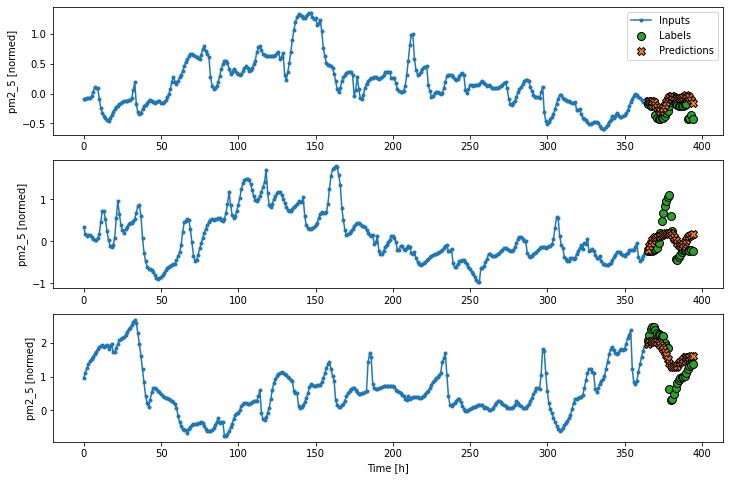

In [ ]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)


multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

#Recurrent neural network
A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state from time-step to time-step.

Below is the working:

Epoch 1/5
369/369 [==============================] - 10s 21ms/step - loss: 0.2569 - mean_absolute_error: 0.3271 - val_loss: 0.0163 - val_mean_absolute_error: 0.0827
Epoch 2/5
369/369 [==============================] - 7s 18ms/step - loss: 0.0529 - mean_absolute_error: 0.1070 - val_loss: 0.0114 - val_mean_absolute_error: 0.0582
Epoch 3/5
369/369 [==============================] - 7s 19ms/step - loss: 0.0484 - mean_absolute_error: 0.0932 - val_loss: 0.0102 - val_mean_absolute_error: 0.0531
Epoch 4/5
369/369 [==============================] - 8s 21ms/step - loss: 0.0468 - mean_absolute_error: 0.0883 - val_loss: 0.0099 - val_mean_absolute_error: 0.0504
Epoch 5/5
97/97 [==============================] - 1s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0485


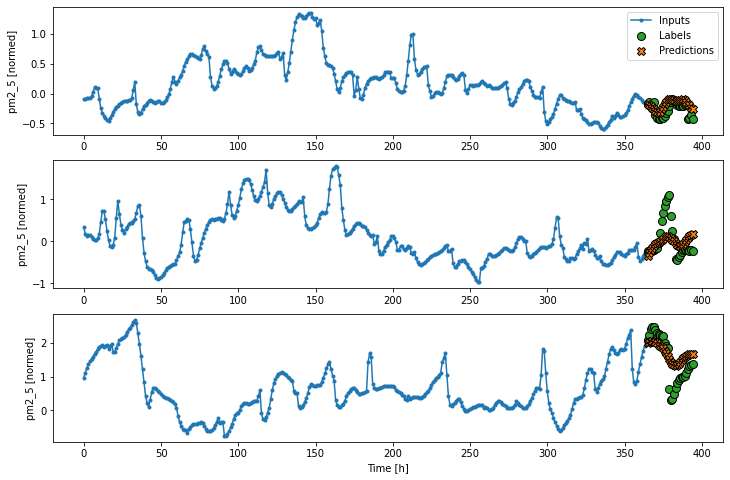

In [ ]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)


multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

# Autoregressive RNN
The model will have the same basic form as the single-step LSTM models from earlier: a tf.keras.layers.LSTM layer followed by a tf.keras.layers.Dense layer that converts the LSTM layer's outputs to model predictions.



In [ ]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

In [ ]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [ ]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [ ]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

In [ ]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 30, 5)


## AR LSTM
- AR LSTM is a hybrid model that combines the strengths of autoregressive (AR) models and long short-term memory (LSTM) neural networks for time-series forecasting.

- By combining the AR model's ability to use past values to predict future values with the LSTM's ability to capture long-term dependencies and nonlinear patterns, the AR LSTM model can provide more accurate and robust predictions for time-series data.



In [ ]:
history = compile_and_fit(feedback_model, multi_window)

# IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

Epoch 1/5
369/369 [==============================] - 249s 654ms/step - loss: 0.2082 - mean_absolute_error: 0.2716 - val_loss: 0.0160 - val_mean_absolute_error: 0.0761
Epoch 2/5
369/369 [==============================] - 235s 636ms/step - loss: 0.0560 - mean_absolute_error: 0.1114 - val_loss: 0.0151 - val_mean_absolute_error: 0.0750
Epoch 3/5
369/369 [==============================] - 232s 629ms/step - loss: 0.0508 - mean_absolute_error: 0.0981 - val_loss: 0.0135 - val_mean_absolute_error: 0.0681
Epoch 4/5
369/369 [==============================] - 237s 643ms/step - loss: 0.0494 - mean_absolute_error: 0.0938 - val_loss: 0.0122 - val_mean_absolute_error: 0.0587
Epoch 5/5
369/369 [==============================] - 237s 643ms/step - loss: 0.0480 - mean_absolute_error: 0.0899 - val_loss: 0.0120 - val_mean_absolute_error: 0.0539


NameError: ignored

## Performance
 

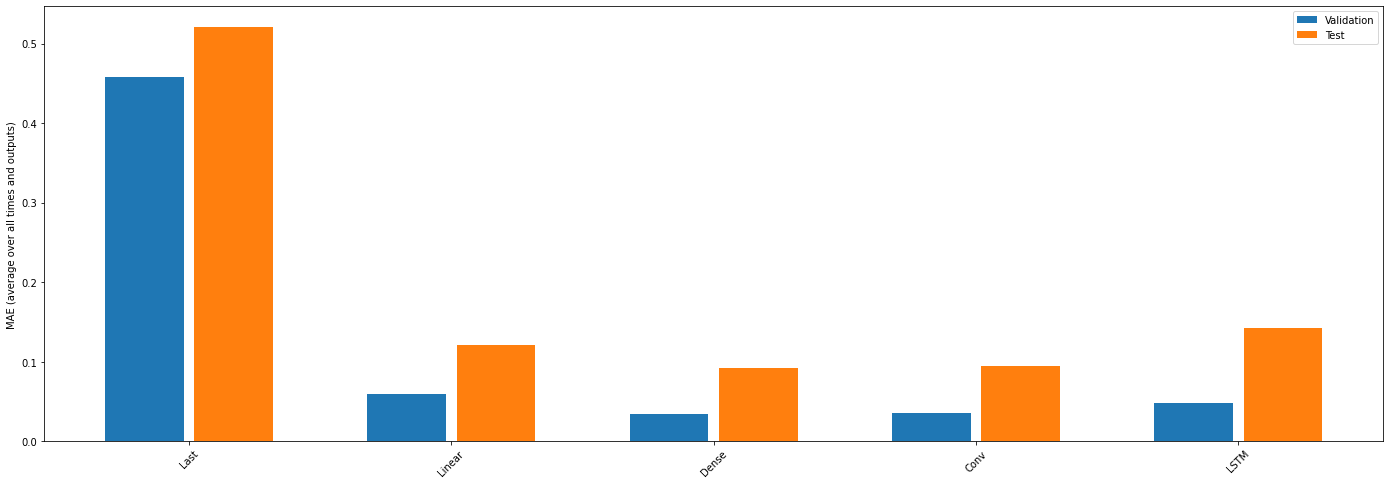

In [ ]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'mean_absolute_error'
# metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[1] for v in multi_val_performance.values()]
test_mae = [v[1] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

#Forecasting with Meta's Prophet

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime as dt

import pandas as pd

from prophet import *
# from 

import pyarrow.parquet as pq
# from download import download

mpl.rcParams['figure.figsize'] = (24, 8)
mpl.rcParams['axes.grid'] = False

from prophet.plot import *


### Data Preprocessing for prophet

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_aqi.csv')
df['dt'] =  pd.to_datetime(df['dt'])

In [ ]:
df['dt'] =  pd.to_datetime(df['dt'])
df = df.set_index('dt')

df = df.resample('d').max()
df.iloc[596] = df.iloc[595]

df = df.rename({col : 'y'}, axis = 'columns')

df = df.reset_index()
df['ds'] = df['dt']
df = df[['y' ,'ds']]
df

# Prophet
### Data convention
Prophet follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

### Baseline prophet Model

In [ ]:
m = Prophet()
m.fit(df)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd
from prophet.diagnostics import cross_validation


param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:

    m = Prophet(**params).fit(df)  # Fit model with given params

    df_cv = cross_validation(m,
                            #  cutoffs=cutoffs,
                             horizon='30 days',
                             parallel="processes"
                             )
    
    df_p = performance_metrics(df_cv, rolling_window=1)

    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)


In [ ]:
# Cross Validation Result 
###    changepoint_prior_scale  seasonality_prior_scale       rmse
### 0                     0.001                     0.01  59.259670
### 1                     0.001                     0.10  58.872859
### 2                     0.001                     1.00  59.095592
### 3                     0.001                    10.00  59.224769
### 4                     0.010                     0.01  55.154196
### 5                     0.010                     0.10  54.626107
### 6                     0.010                     1.00  54.459722
### 7                     0.010                    10.00  54.897395
### 8                     0.100                     0.01  45.326113
### 9                     0.100                     0.10  45.598586
### 10                    0.100                     1.00  45.565816
### 11                    0.100                    10.00  45.614166
### 12                    0.500                     0.01  43.471821
### 13                    0.500                     0.10  43.527550
### 14                    0.500                     1.00  43.512779
### 15                    0.500                    10.00  43.493908


### inserting Yearly seasonality as a Regressor  


In [ ]:
param = {  
    # 'changepoint_prior_scale': 0.500,
    # 'seasonality_prior_scale': 10.00,
    # 'yearly_seasonality':True
}
# m2 = Prophet(**params)
m2 = Prophet(seasonality_mode='multiplicative',
                weekly_seasonality=True,
                daily_seasonality=False)
m2.add_seasonality(name='yearly', period=365, fourier_order=20)
# m2.add_seasonality(name='yearly', period=365, fourier_order=10)


In [ ]:
m = Prophet(
            seasonality_mode='multiplicative',
            weekly_seasonality=True,
            daily_seasonality=False
            )
m.add_seasonality(
                  name='yearly',
                  period=365,
                  fourier_order=20
                  )

In [ ]:
m2.fit(df)

In [ ]:
future = m2.make_future_dataframe(periods=365) # horizon

future['yearly'] = future['ds'].apply(lambda x: x.year - 1) # addition 

forecast = m2.predict(future)

In [ ]:
plot_plotly(m2, forecast)

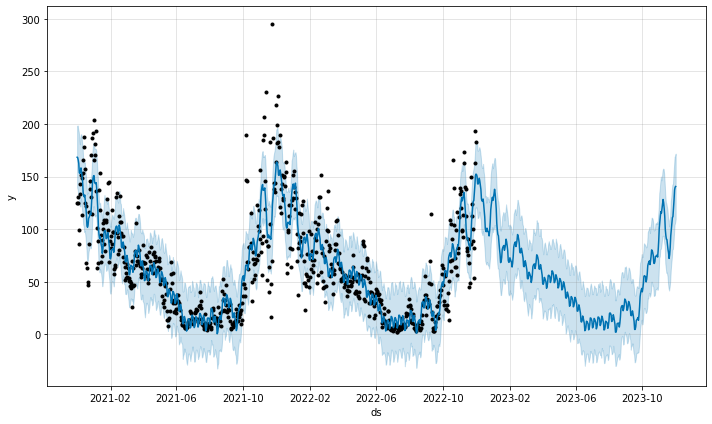

In [ ]:
fig = m2.plot(forecast)

In [ ]:
plot_components_plotly(m2, forecast)

# Neural Prophet
 
NeuralProphet is an easy to learn framework for interpretable time series forecasting. NeuralProphet is built on PyTorch and combines Neural Network and traditional time-series algorithms, inspired by Facebook Prophet and AR-Net.

With few lines of code, you can define, customize, visualize, and evaluate your own forecasting models.

It is designed for iterative human-in-the-loop model building. That means that you can build a first model quickly, interpret the results, improve, repeat. Due to the focus on interpretability and customization-ability, NeuralProphet may not be the most accurate model out-of-the-box; so, don't hesitate to adjust and iterate until you like your results.
 

In [ ]:
#AQI

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aqi/1_Adilabad_data.csv')
# df['dt'] =  pd.to_datetime(df['dt'])

In [ ]:
df.head(1)

y         ds
0  95.62 2020-12-01

In [ ]:
df['dt'] =  pd.to_datetime(df['dt'])
df = df.set_index('dt')

df = df.resample('d').max()
df.iloc[596] = df.iloc[595]

df = df.rename({'pm2_5' : 'y'}, axis = 'columns')

df = df.reset_index()
df['ds'] = df['dt']
df = df[['y','ds']]
df

y         ds
0     95.62 2020-12-01
1    124.69 2020-12-02
2    125.09 2020-12-03
3    130.14 2020-12-04
4     98.76 2020-12-05
..      ...        ...
808   84.98 2023-02-17
809  122.39 2023-02-18
810  155.47 2023-02-19
811  135.35 2023-02-20
812   91.61 2023-02-21

[813 rows x 2 columns]

In [ ]:
mnp2 = NeuralProphet(
    n_lags = 2 *  365,
    n_forecasts= 365,
)

In [ ]:
metrics = mnp2.fit(df) 

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
WARNING - (NP.forecaster.__handle_missing_data) - 2 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 2 NaN values in column y were auto-imputed.
INFO:NP.forecaster:2 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_season

Finding best initial lr:   0%|          | 0/206 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
future = mnp2.make_future_dataframe(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast = mnp2.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster.__handle_missing_data) - 2 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 2 NaN values in column y were auto-imputed.
INFO:NP.forecaster:2 NaN values in column y were auto-imputed.


Predicting: 6it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/neuralprophet/forecaster.py:3086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/neuralprophet/forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

  df_forecast[name] = yhat

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returnin

In [ ]:
metrics.iloc[-1]

MAE          6.938352
RMSE         9.045001
Loss         0.001419
RegLoss      0.000000
epoch      601.000000
Name: 601, dtype: float64

WARNING - (NP.forecaster.plot_last_forecast) - plot_last_forecast() has been renamed to plot_latest_forecast() and is therefore deprecated. Please use plot_latst_forecast() in the future
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


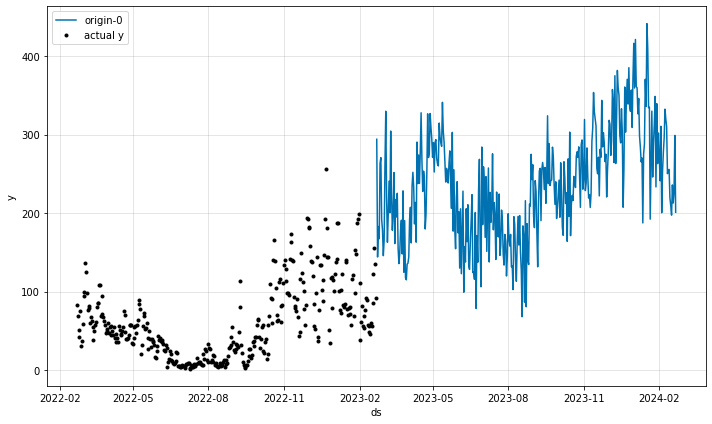

In [ ]:
mnp2 = mnp2.highlight_nth_step_ahead_of_each_forecast(None)  # reset highlight
fig = mnp2.plot_last_forecast(forecast)


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


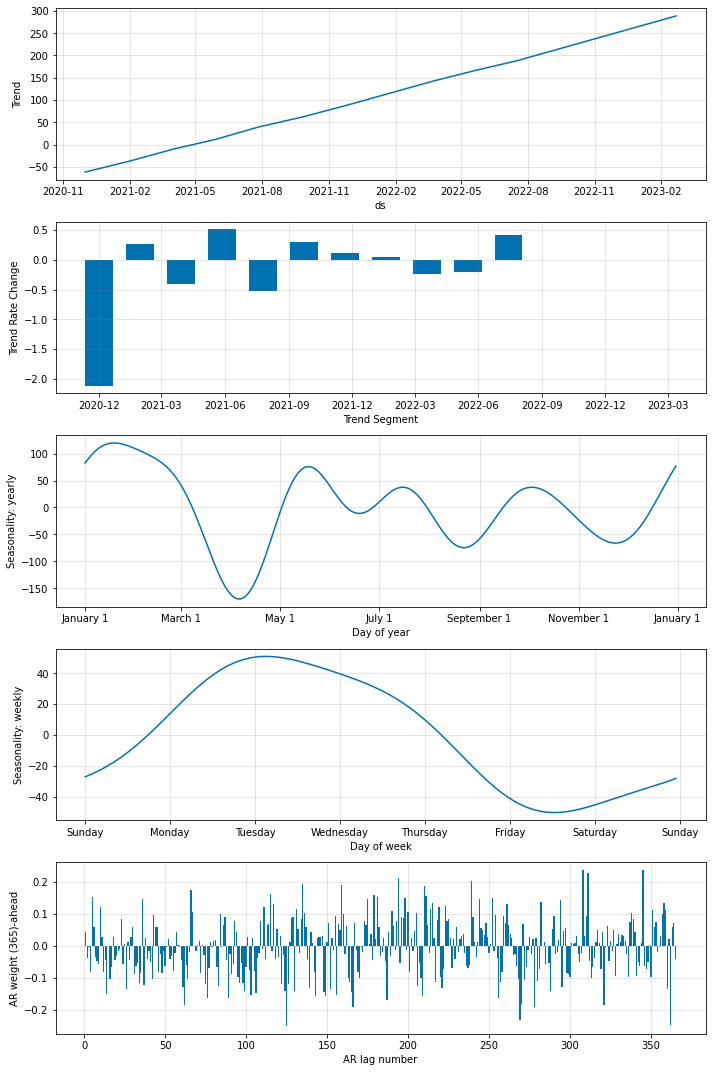

In [ ]:
mnp2 = mnp2.highlight_nth_step_ahead_of_each_forecast(365)
fig_param = mnp2.plot_parameters()

In [ ]:
mnp_base = NeuralProphet()

In [ ]:
metrics = mnp_base.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.forecaster.__handle_missing_data) - dropped 2 NAN row in 'y'
INFO:NP.forecaster:dropped 2 NAN row in 'y'
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO -

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
metrics.iloc[-1]

MAE         20.841217
RMSE        28.877365
Loss         0.013266
RegLoss      0.000000
epoch      207.000000
Name: 207, dtype: float64

In [ ]:
forecast = mnp_base.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 51it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


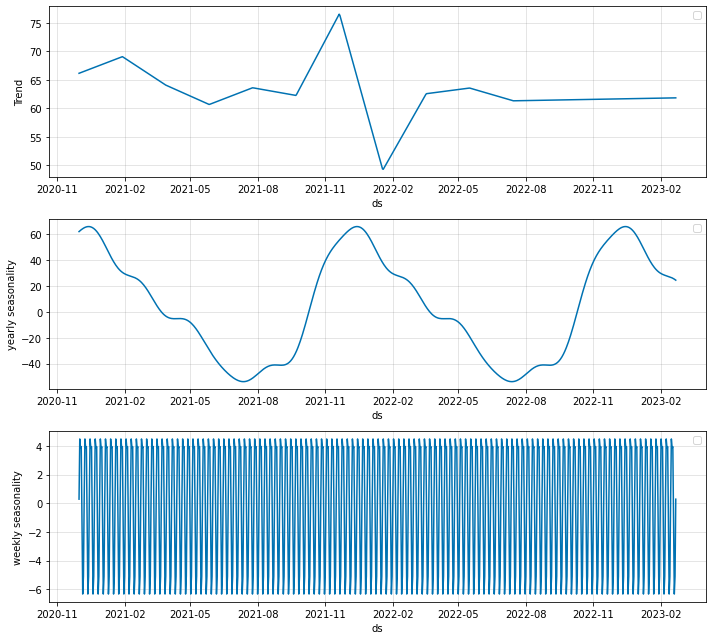

In [ ]:
fig = mnp_base.plot_components(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


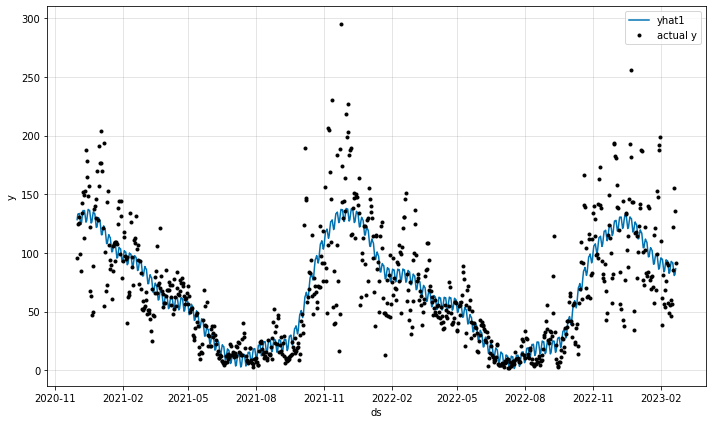

In [ ]:
forecasts_plot = mnp_base.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 51it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


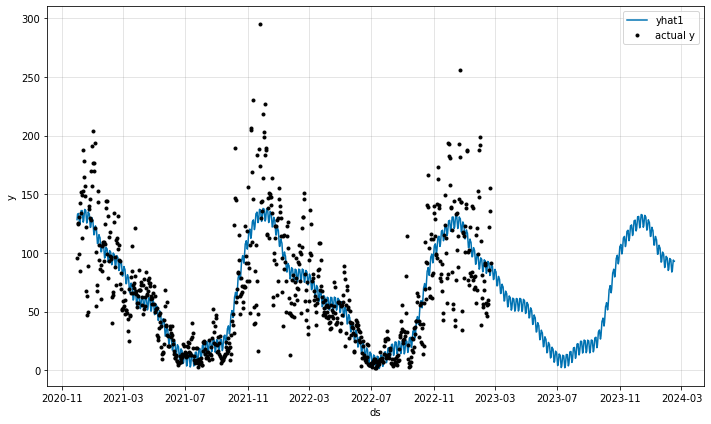

In [ ]:
# base 360 step fowwards 
future = mnp_base.make_future_dataframe(df, periods=360, n_historic_predictions=len(df))
forecast = mnp_base.predict(future)
fig = mnp_base.plot(forecast)

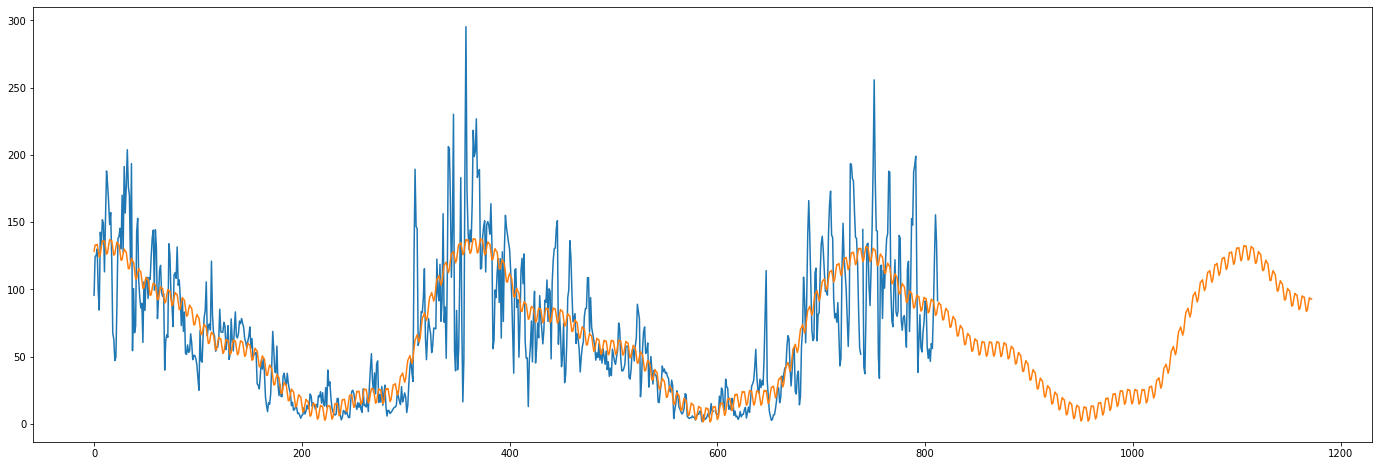

In [ ]:
ax = df['y'].plot()
ax = forecast['yhat1'].plot()

In [ ]:
#------------------------------

In [ ]:
m2 = NeuralProphet(
    n_lags= 365,
    n_forecasts= 365,
    weekly_seasonality=False
)

In [ ]:
metrics = m2.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
WARNING - (NP.forecaster.__handle_missing_data) - 2 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 2 NaN values in column y were auto-imputed.
INFO:NP.forecaster:2 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_season

Finding best initial lr:   0%|          | 0/206 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
metrics.iloc[-1]

MAE        1.110321e-01
RMSE       1.943385e-01
Loss       6.572384e-07
RegLoss    0.000000e+00
epoch      6.010000e+02
Name: 601, dtype: float64

In [ ]:
forecast = m2.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster.__handle_missing_data) - 2 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 2 NaN values in column y were auto-imputed.
INFO:NP.forecaster:2 NaN values in column y were auto-imputed.


Predicting: 6it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/neuralprophet/forecaster.py:3086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/neuralprophet/forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

  df_forecast[name] = yhat

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returnin

In [ ]:
fig = m2.plot_components(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


In [ ]:
forecasts_plot = m2.plot(forecast)

In [ ]:
  from __future__ import absolute_import, division, print_function, unicode_literals

  import seaborn as sns

  import matplotlib as mpl
  import matplotlib.pyplot as plt
  import numpy as np
  import os
  import datetime as dt

  import pandas as pd

  from prophet import *
  # from 

  import pyarrow.parquet as pq


  # from download import download

  mpl.rcParams['figure.figsize'] = (24, 8)
  mpl.rcParams['axes.grid'] = False

  horizon = 365

  from prophet.plot import *
  import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/aqi/1_Adilabad_data.csv')

In [ ]:
df['dt'] =  pd.to_datetime(df['dt'])
df = df.set_index('dt')

df = df.resample('d').max()
df.iloc[596] = df.iloc[595]

df = df.rename({'pm2_5' : 'y'}, axis = 'columns')

df = df.reset_index()
df['ds'] = df['dt']
df = df[['y','ds']]

y         ds
0     95.62 2020-12-01
1    124.69 2020-12-02
2    125.09 2020-12-03
3    130.14 2020-12-04
4     98.76 2020-12-05
..      ...        ...
808   84.98 2023-02-17
809  122.39 2023-02-18
810  155.47 2023-02-19
811  135.35 2023-02-20
812   91.61 2023-02-21

[813 rows x 2 columns]

In [ ]:
df.head(1)

y         ds
0  95.62 2020-12-01

Model with 2 year Lag

In [ ]:
mnp2 = NeuralProphet(
    n_lags = 2 *  365,
    n_forecasts= 365,
)

In [ ]:
metrics = mnp2.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
WARNING - (NP.forecaster.__handle_missing_data) - 2 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 2 NaN values in column y were auto-imputed.
INFO:NP.forecaster:2 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_season

Finding best initial lr:   0%|          | 0/206 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
future = mnp2.make_future_dataframe(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
forecast = mnp2.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.863% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster.__handle_missing_data) - 2 missing values in column y were detected in total. 
INFO - (NP.forecaster.__handle_missing_data) - 2 NaN values in column y were auto-imputed.
INFO:NP.forecaster:2 NaN values in column y were auto-imputed.


Predicting: 6it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/neuralprophet/forecaster.py:3086: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

  df_forecast[name] = yhat

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/neuralprophet/forecaster.py:3108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_forecast[name] = yhat

  df_forecast[name] = yhat

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returnin

In [ ]:
metrics.iloc[-1]

MAE          6.938352
RMSE         9.045001
Loss         0.001419
RegLoss      0.000000
epoch      601.000000
Name: 601, dtype: float64

WARNING - (NP.forecaster.plot_last_forecast) - plot_last_forecast() has been renamed to plot_latest_forecast() and is therefore deprecated. Please use plot_latst_forecast() in the future
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


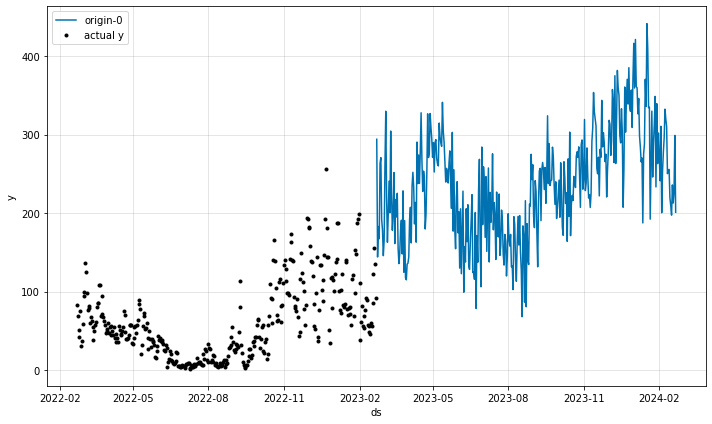

In [ ]:
mnp2 = mnp2.highlight_nth_step_ahead_of_each_forecast(None)  # reset highlight
fig = mnp2.plot_last_forecast(forecast)


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


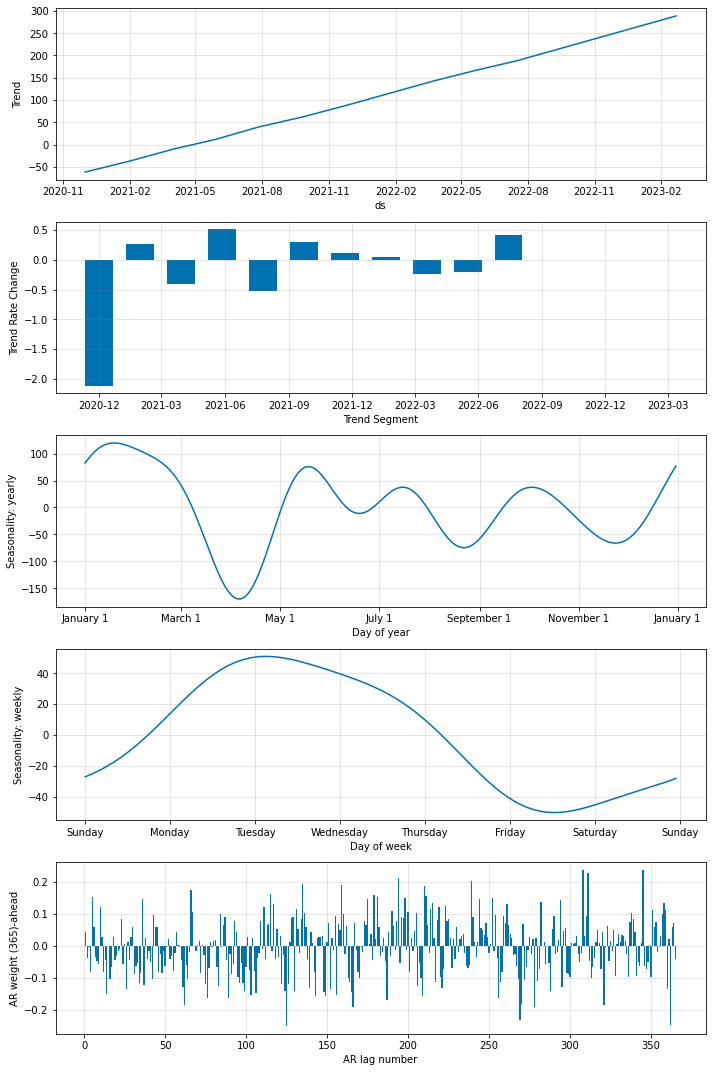

In [ ]:
mnp2 = mnp2.highlight_nth_step_ahead_of_each_forecast(365)
fig_param = mnp2.plot_parameters()

In [ ]:
mnp_base = NeuralProphet()

In [ ]:
metrics = mnp_base.fit(df)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO:NP.df_utils:Dataframe freq automatically defined as D
INFO - (NP.forecaster.__handle_missing_data) - dropped 2 NAN row in 'y'
INFO:NP.forecaster:dropped 2 NAN row in 'y'
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO -

Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
metrics.iloc[-1]

MAE         20.841217
RMSE        28.877365
Loss         0.013266
RegLoss      0.000000
epoch      207.000000
Name: 207, dtype: float64

In [ ]:
forecast = mnp_base.predict(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D


Predicting: 51it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


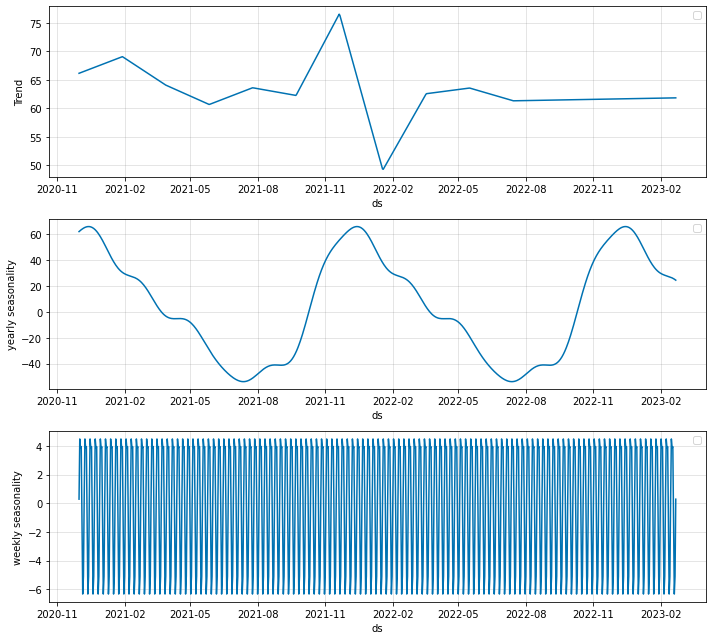

In [ ]:
fig = mnp_base.plot_components(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


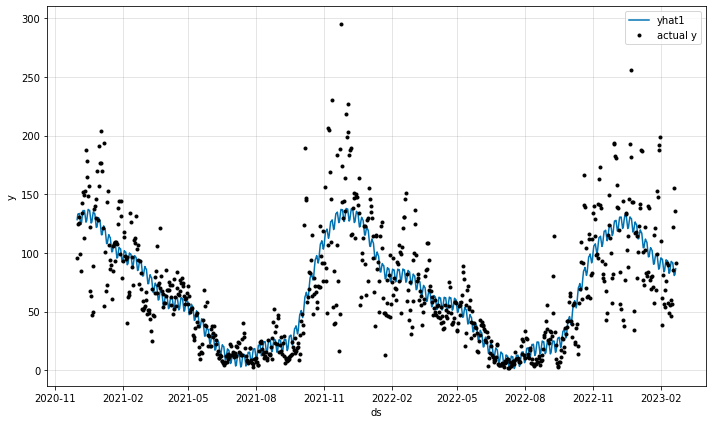

In [ ]:
forecasts_plot = mnp_base.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.877% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.877% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.915% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.915% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 51it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


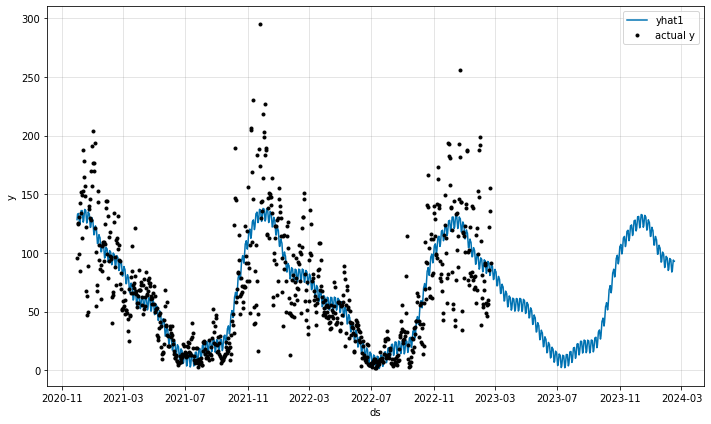

In [ ]:
# base 360 step fowwards 
future = mnp_base.make_future_dataframe(df, periods=360, n_historic_predictions=len(df))
forecast = mnp_base.predict(future)
fig = mnp_base.plot(forecast)

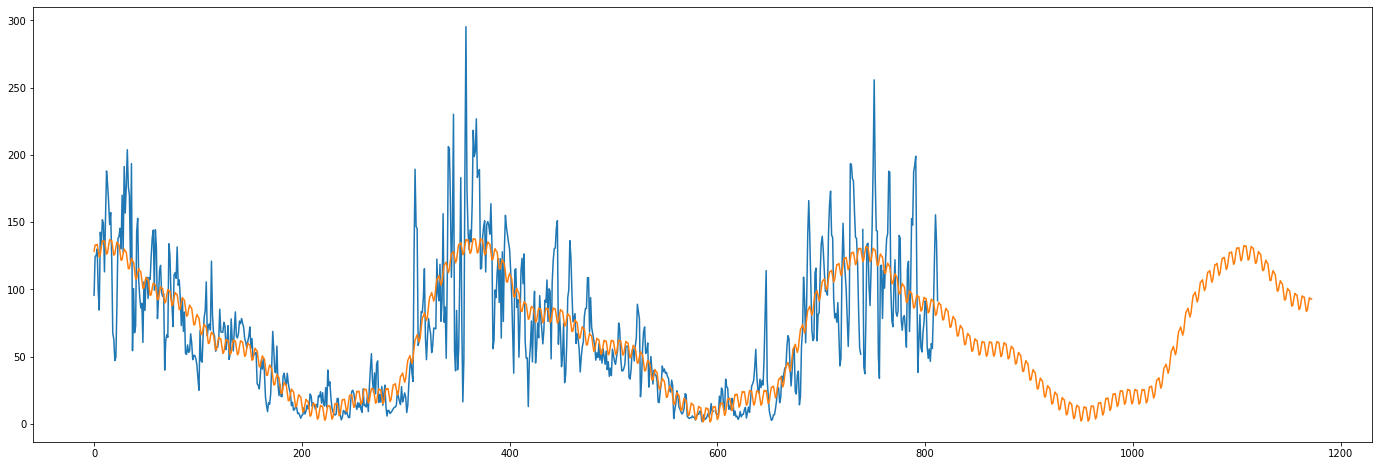

In [ ]:
ax = df['y'].plot()
ax = forecast['yhat1'].plot()